## Observations and Insights 

Observations:
1. Based on the scatter plot, mice who weighed more had higher tumor volumes when on the Capomulin drug regimen. This regimen is not as effective as a mouse's weight increases.
2. However, based on the box plot, Capomulin was the most effective drug. Mice who were on Capomulin had lower tumor volumes at the end of the study. The line plot can show how one mouse's tumor volume lowered significantly over time while on Capomulin.
3. Capomulin and Ramicane had similar numbers of timepoints and produced similar results. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.duplicated(["Mouse ID", "Timepoint"])

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.drop_duplicates(["Mouse ID", "Timepoint"])
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_volume_per_regimen = clean_df.groupby(["Drug Regimen"])
tumor_volume_mean = tumor_volume_per_regimen.mean()["Tumor Volume (mm3)"]
tumor_volume_median = tumor_volume_per_regimen.median()["Tumor Volume (mm3)"]
tumor_volume_variance = tumor_volume_per_regimen.var()["Tumor Volume (mm3)"]
tumor_volume_std = tumor_volume_per_regimen.std()["Tumor Volume (mm3)"]
tumor_volume_SEM = tumor_volume_per_regimen.sem()["Tumor Volume (mm3)"]

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_per_regimen_df = pd.DataFrame({"Mean": tumor_volume_mean, "Median": tumor_volume_median, "Variance": tumor_volume_variance, "Standard Deviation": tumor_volume_std, "SEM": tumor_volume_SEM})
tumor_volume_per_regimen_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'# of Timepoints for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Timepoints'>

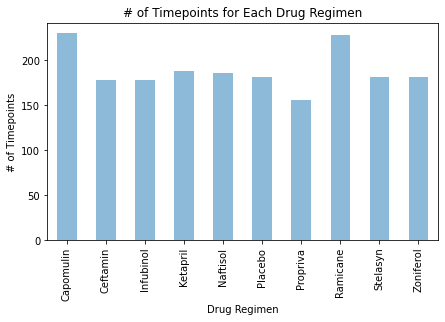

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
clean_df.groupby(["Drug Regimen"])["Timepoint"].size().plot(kind="bar", figsize=(7, 4), alpha=0.5, align="center", title=("# of Timepoints for Each Drug Regimen"), xlabel=("Drug Regimen"), ylabel=("# of Timepoints"))

Text(0, 0.5, '# of Timepoints')

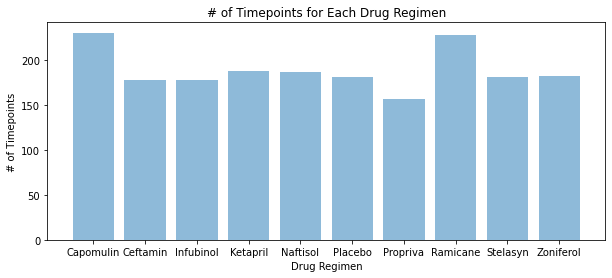

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimens = tumor_volume_per_regimen_df.index.tolist()
timepoints_per_drug_regimen = (clean_df.groupby(["Drug Regimen"])["Timepoint"].count()).tolist()
x = np.arange(len(timepoints_per_drug_regimen))
x = drug_regimens
plt.figure(figsize=(10,4))
plt.bar(x, timepoints_per_drug_regimen, alpha=0.5, align="center")
plt.title("# of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Timepoints")

<AxesSubplot:title={'center':'Female versus Male Mice'}, ylabel='None'>

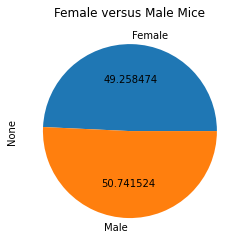

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df.groupby("Sex").size().plot(kind="pie", autopct="%2f", title=("Female versus Male Mice"))

([<matplotlib.patches.Wedge at 0x1ff764476a0>,
 [Text(0.02562299800632446, 1.099701533132135, 'Female'),
  Text(-0.025623100967812958, -1.099701530733132, 'Male')],
 [Text(0.01397618073072243, 0.5998371998902553, '49.258474'),
  Text(-0.01397623689153434, -0.5998371985817083, '50.741524')])

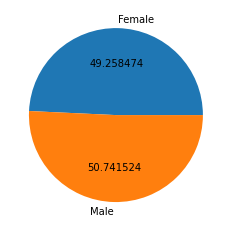

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = (clean_df.groupby(["Sex"])["Age_months"].count()).tolist()
labels = ["Female", "Male"]
plt.pie(sex_count, labels=labels, autopct="%2f")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
list_four_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
four_regimens = clean_df[clean_df["Drug Regimen"].isin(list_four_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = pd.DataFrame(four_regimens.groupby("Mouse ID")["Timepoint"].max()).reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_at_last_timepoint = pd.merge(clean_df, last_timepoint, how="left", on=["Mouse ID"])
tumor_vol_at_last_timepoint.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45.0
1,k403,Ramicane,Male,21,16,5,38.825898,0,45.0
2,k403,Ramicane,Male,21,16,10,35.014271,1,45.0
3,k403,Ramicane,Male,21,16,15,34.223992,1,45.0
4,k403,Ramicane,Male,21,16,20,32.997729,1,45.0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in list_four_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = tumor_vol_at_last_timepoint["Tumor Volume (mm3)"].loc[tumor_vol_at_last_timepoint["Drug Regimen"] == regimen]
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile - (1.5 * iqr)
    
    print(f"The lower quartile is: {lower_quartile}")
    print(f"The upper quartile is: {upper_quartile}")
    print(f"For {regimen}, values below {lower_bound} are outliers")
    print(f"For {regimen}, values above {upper_bound} are outliers")

The lower quartile is: 37.685932865
The upper quartile is: 45.0
For Capomulin, values below 26.714832162499995 are outliers
For Capomulin, values above 34.0288992975 are outliers
The lower quartile is: 36.674634585
The upper quartile is: 45.0
For Ramicane, values below 24.1865864625 are outliers
For Ramicane, values above 32.511951877499996 are outliers
The lower quartile is: 47.3123533
The upper quartile is: 57.314443967500004
For Infubinol, values below 32.309217298749985 are outliers
For Infubinol, values above 42.31130796625 are outliers
The lower quartile is: 47.2084271125
The upper quartile is: 56.801437570000004
For Ceftamin, values below 32.81891142624998 are outliers
For Ceftamin, values above 42.41192188375 are outliers


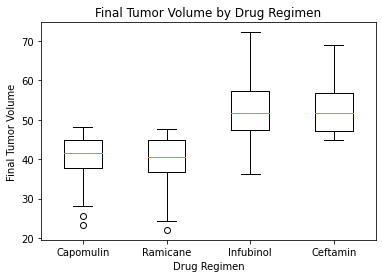

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data)
plt.title("Final Tumor Volume by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel("Final Tumor Volume")
plt.show()

## Line and Scatter Plots

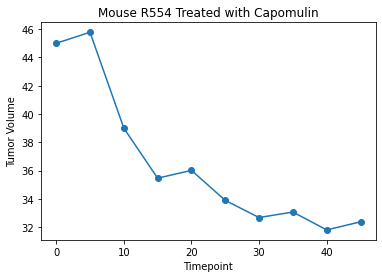

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = clean_df.loc[clean_df["Mouse ID"] == "r554"]
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"], marker="o")
plt.title("Mouse R554 Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.show()

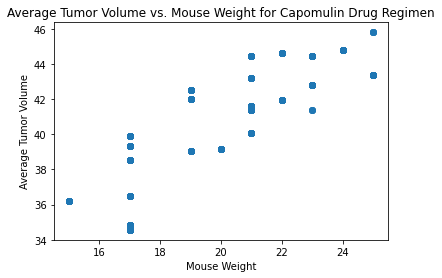

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
tumor_vol_per_mouse = pd.DataFrame(capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values().reset_index()).rename(columns={"Tumor Volume (mm3)": "average_tumor_vol"})
capo_tumor_vol = pd.merge(capomulin, tumor_vol_per_mouse, on="Mouse ID")
x = capo_tumor_vol["Weight (g)"]
y = capo_tumor_vol["average_tumor_vol"]
plt.scatter(x,y)
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Drug Regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient
correlation = st.pearsonr(x, y)
corr_coef = round(correlation[0],2)
print(f"The correlation coefficient for mouse weight and average tumor volume on the Capomulin regimen is {corr_coef}")

The correlation coefficient for mouse weight and average tumor volume on the Capomulin regimen is 0.83


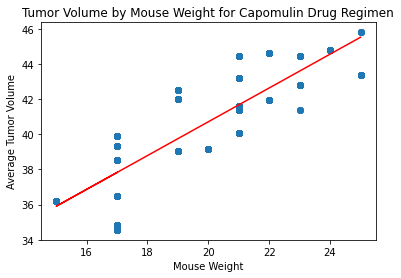

In [19]:
# linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_val = x * slope + intercept
line = "y =" + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y)
plt.plot(x, regress_val, "r-")
plt.title("Tumor Volume by Mouse Weight for Capomulin Drug Regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()